In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot  as plt

Read a comma-separated values (csv) file into DataFrame.

In [19]:
# VSCODE
# PATH = "cancer_Data.csv"

# colab
PATH = "/content/drive/MyDrive/Ml_Project/Cancer_Data.csv"

cancer_data = pd.read_csv(PATH)

In Python pandas, the head() function displays the first few rows of a DataFrame or Series, helping users see the data's structure.

In [ ]:
cancer_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


The info() method prints information about the DataFrame.
The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).

In [ ]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5


The nunique() method returns the number of unique values for each column.

In [20]:
cancer_data.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
Unnamed:

Definition and Usage. The drop() method removes the specified row or column. By specifying the column axis ( axis='columns' ), the drop() method removes the specified column.

In [21]:
cancer_data.drop(['Unnamed: 32'], axis = 1, inplace = True)

Show the counts of observations in each categorical bin using bars.
A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable.

<Axes: xlabel='diagnosis', ylabel='count'>

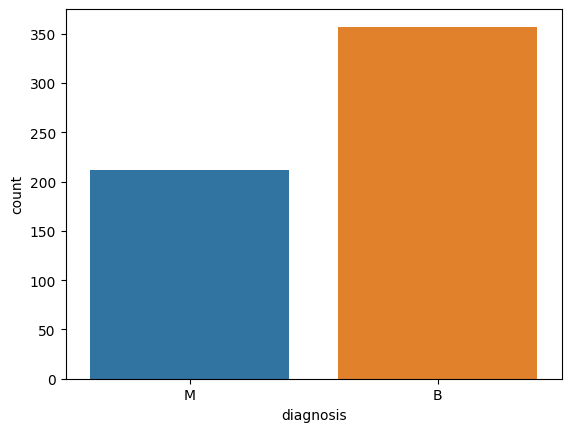

In [22]:
sns.countplot(cancer_data, x='diagnosis')

Plot pairwise relationships in a dataset. By default, this function will create a grid of Axes such that each numeric variable in data will by shared across the y-axes across a single row and the x-axes across a single column.

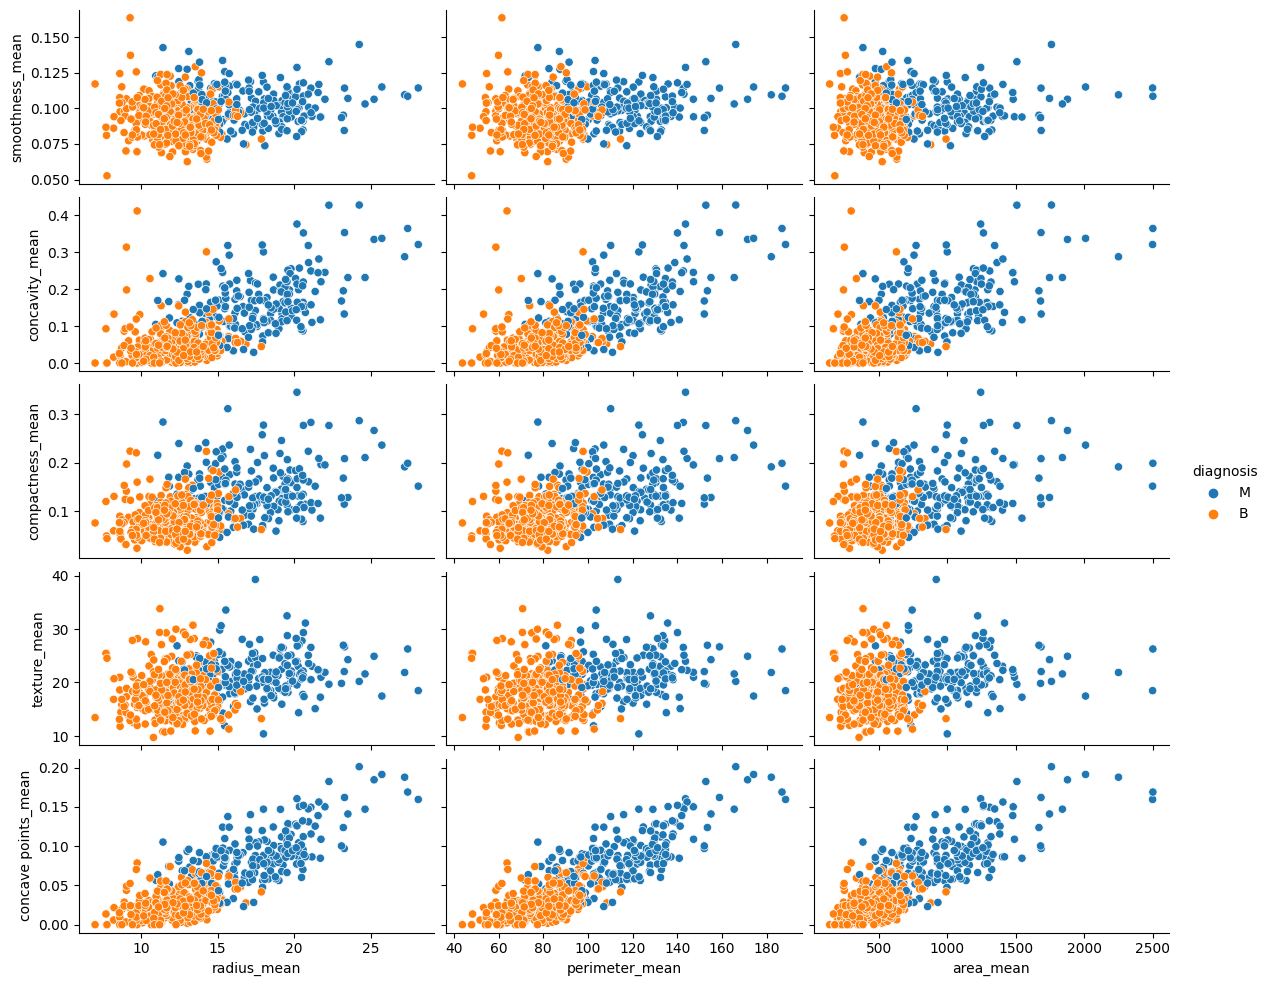

In [23]:
# Creating Pairplots to visulise trends
dimensions = ['radius_mean','perimeter_mean','area_mean']
other = ['smoothness_mean','concavity_mean','compactness_mean','texture_mean','concave points_mean']
sns.pairplot(data = cancer_data, hue = 'diagnosis', x_vars = dimensions, y_vars = other, aspect = 2, height = 2)

**Notes:**

1- It seems that malignant tumours almost always tend to be larger than benign in all ways possible (area, perimeter and radius)

2- Concaves seem to be more extreme in malignant tumours as shown by the positive correlation between 'concavity_mean' and 'concave points_mean' and the values relating to the dimensions of the tumour (As mentioned before, Malignant Tumors seem to be larger)

Histograms are used to display the distribution of one or several numerical variables. Seaborn enables us to plot both the histogram bars as well as a density curve obtained the same way than kdeplots.

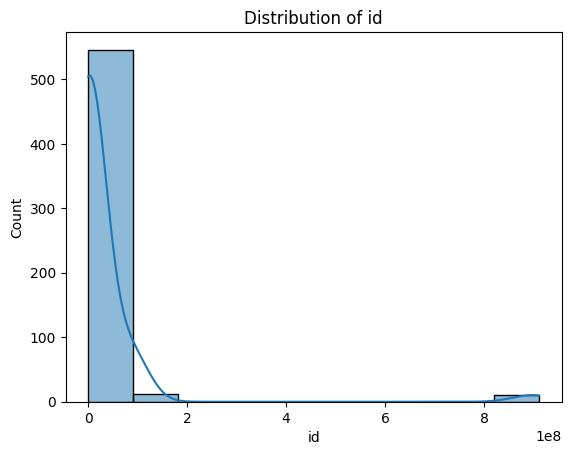

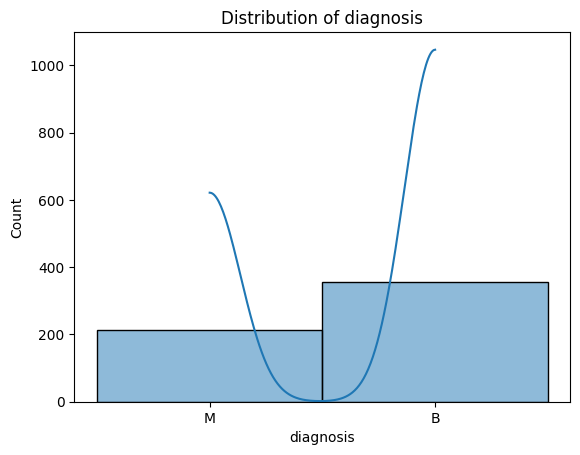

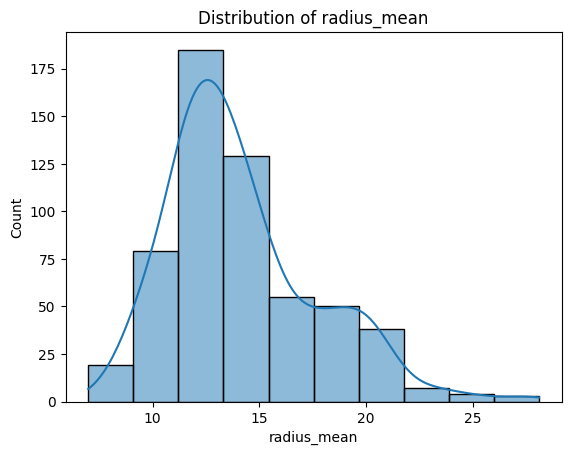

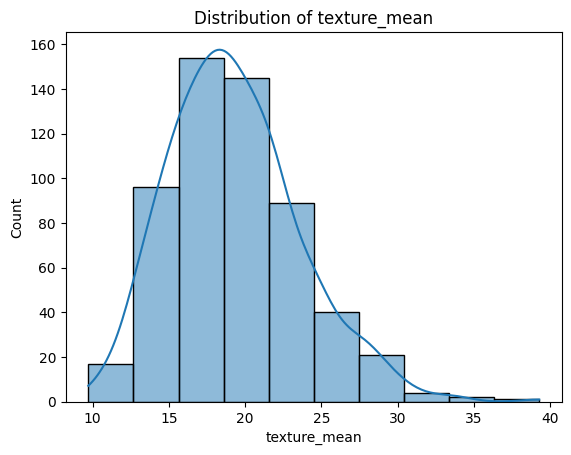

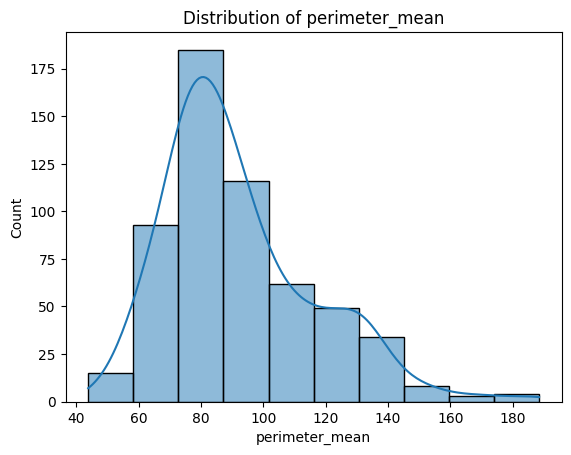

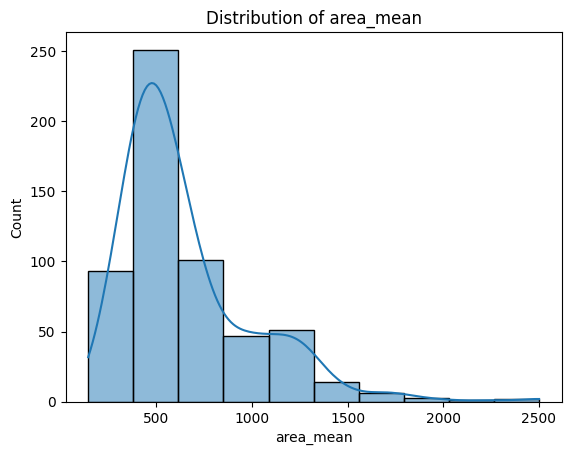

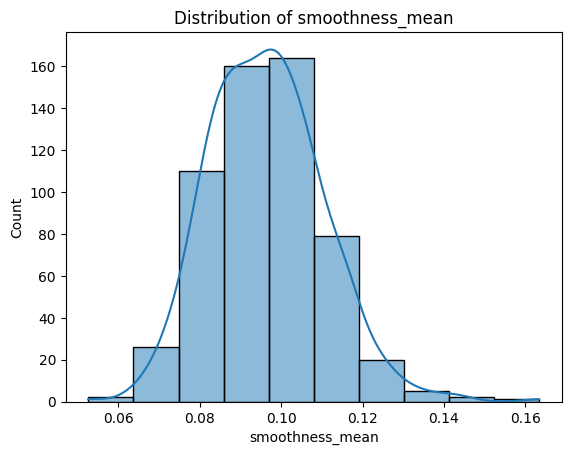

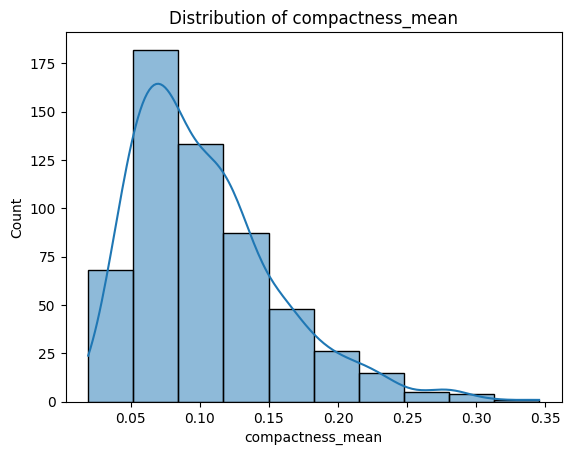

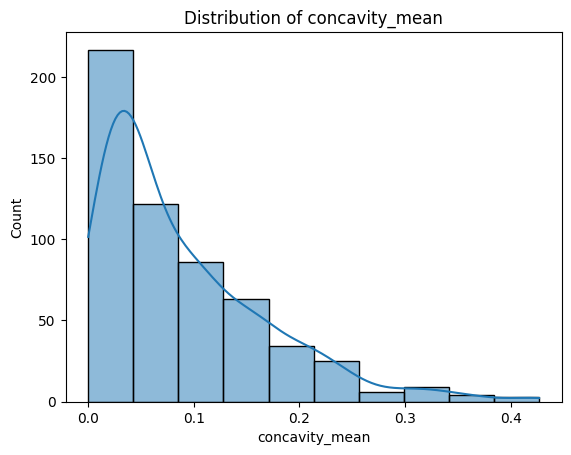

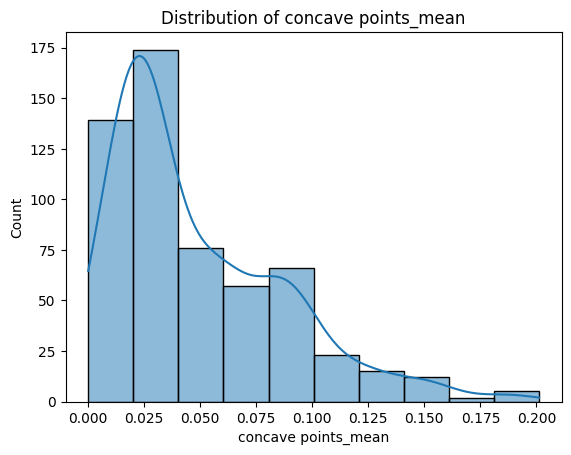

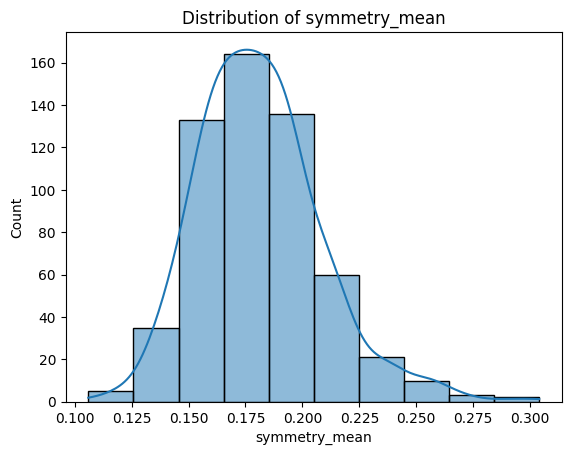

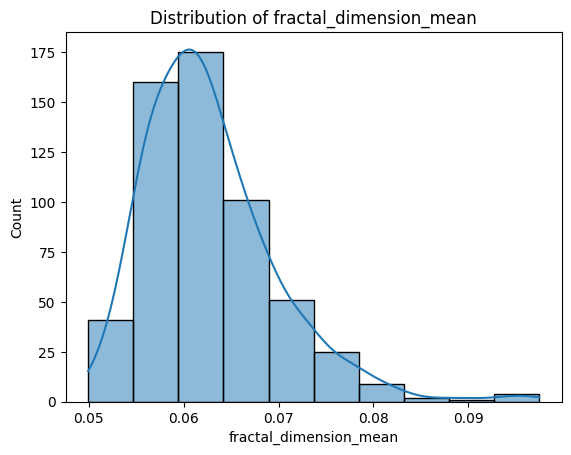

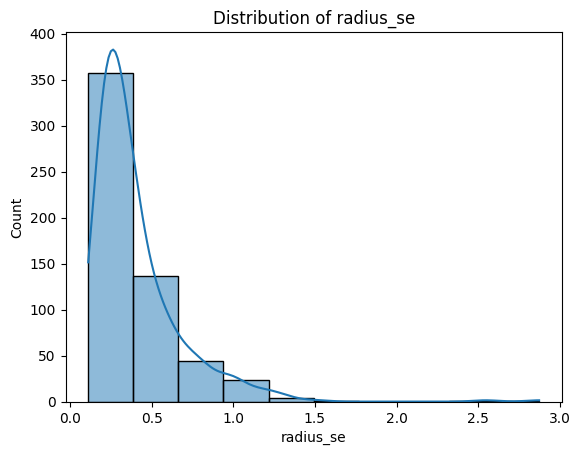

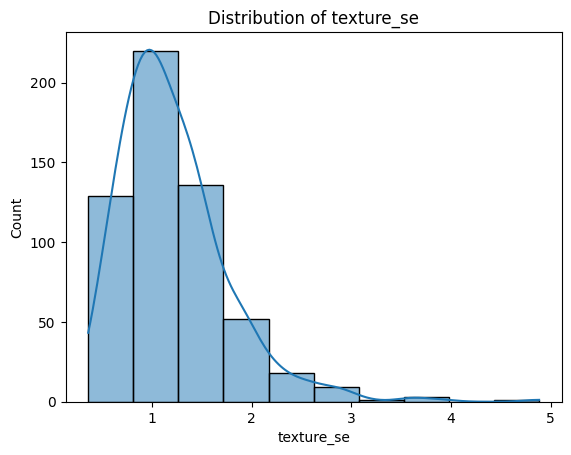

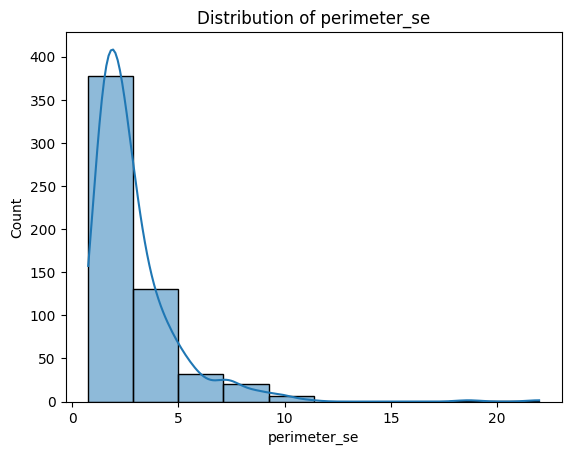

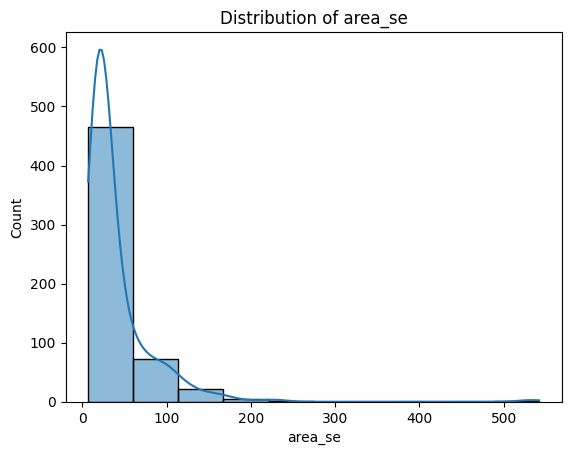

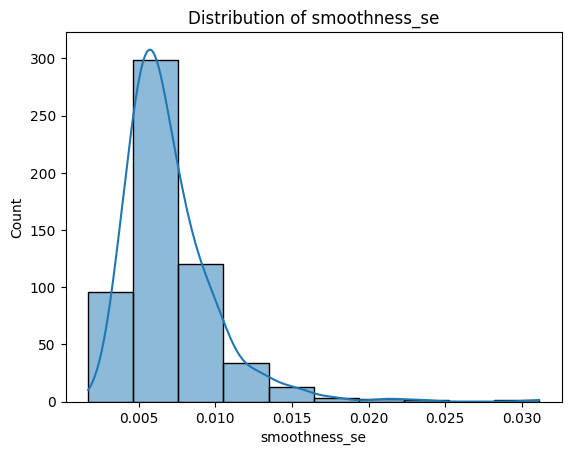

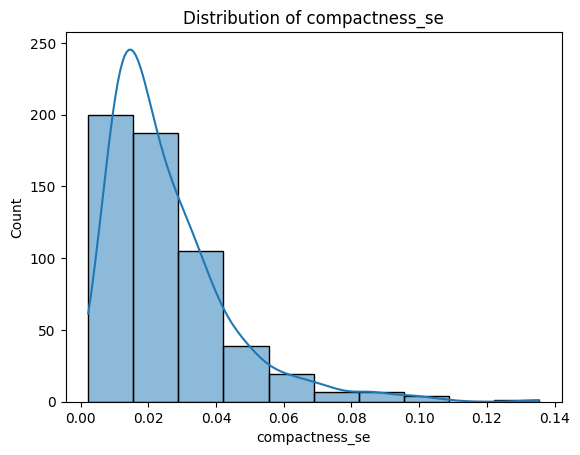

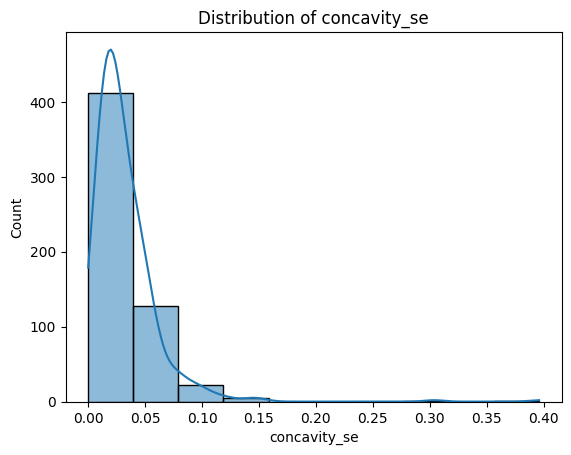

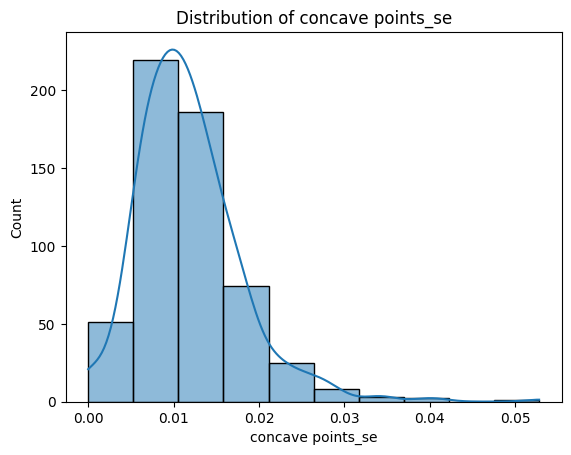

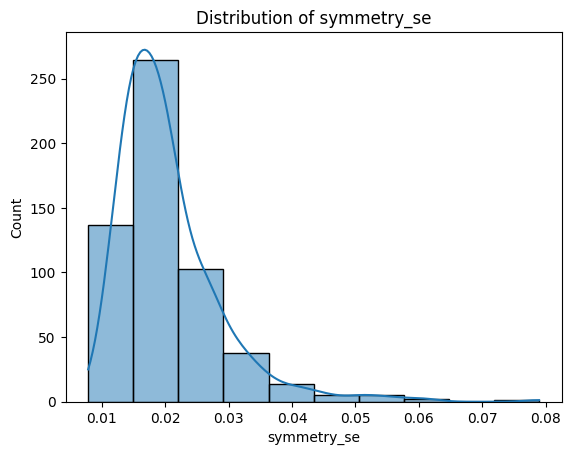

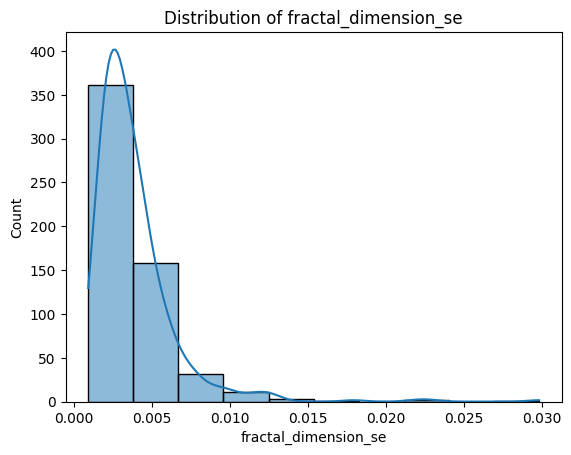

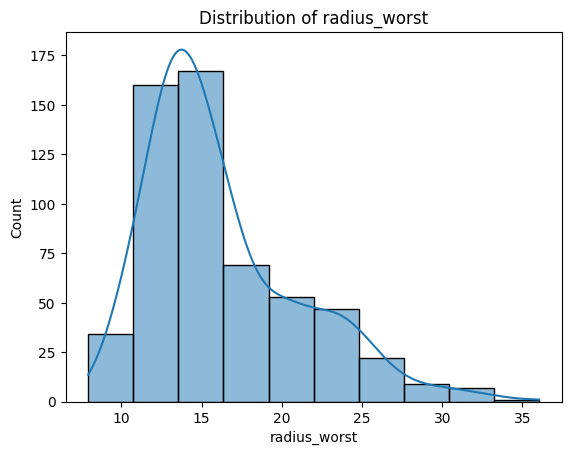

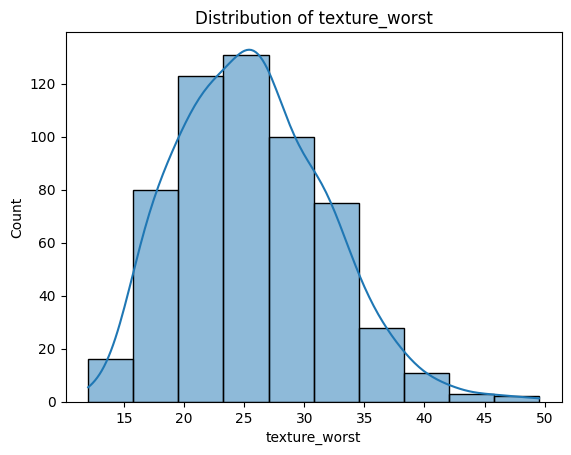

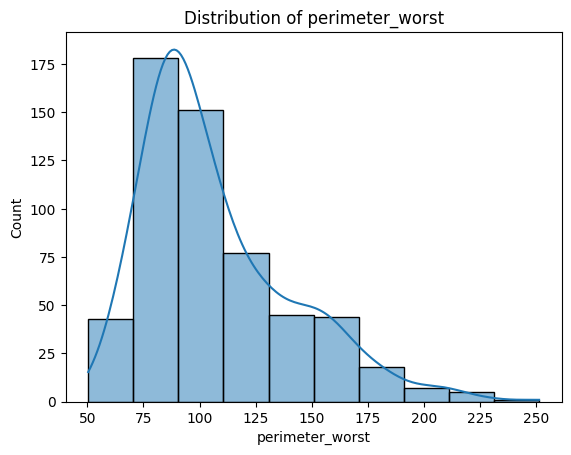

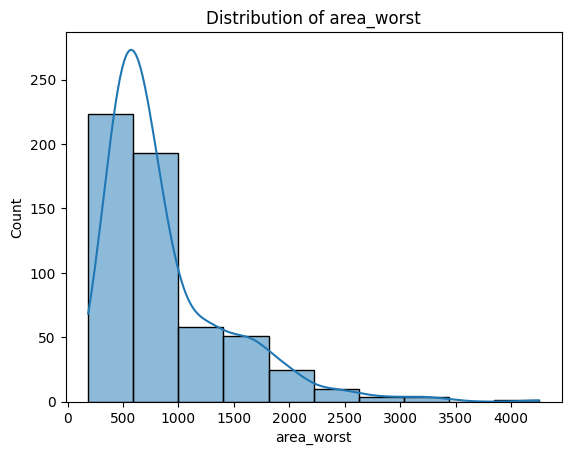

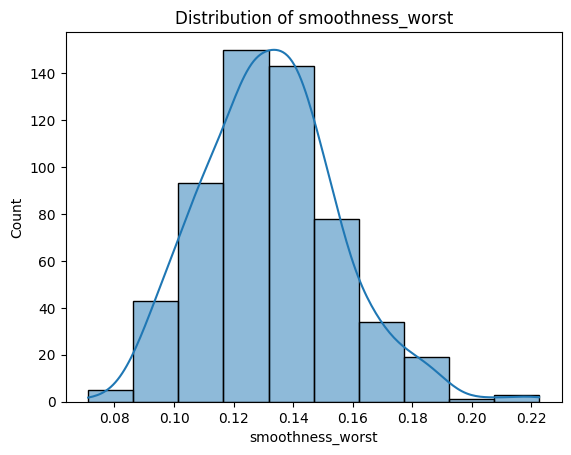

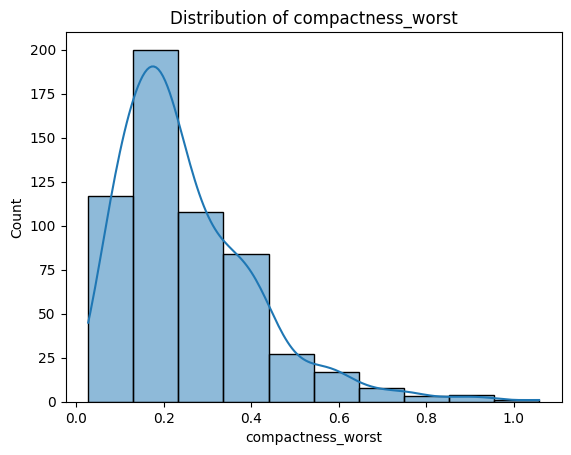

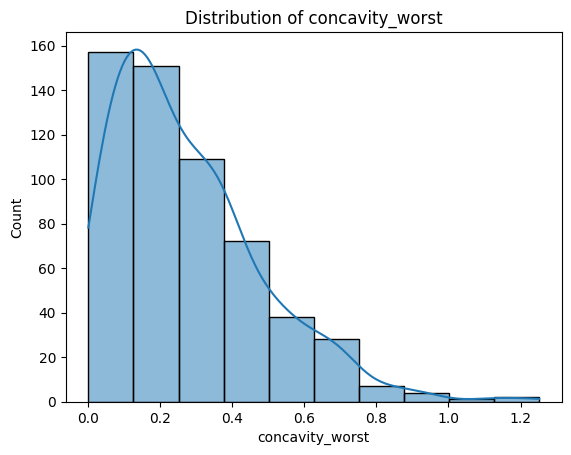

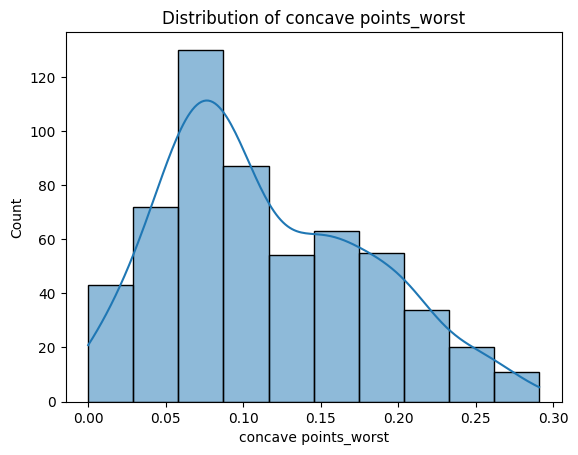

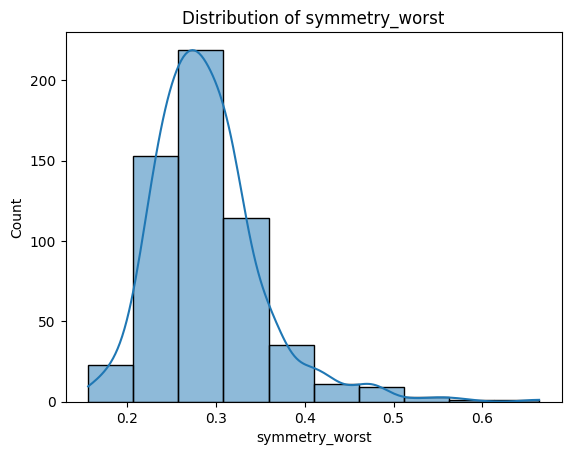

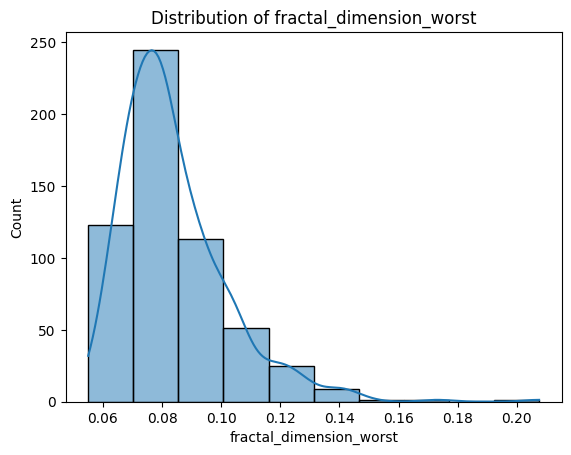

In [ ]:
for i in cancer_data.columns:
    plt.title(f'Distribution of {i}')
    sns.histplot(x = i , data = cancer_data, kde = True, bins = 10)
    plt.show()

In [24]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score , precision_score, f1_score, classification_report
from sklearn.model_selection import train_test_split

**The fit_transform()** method is used to fit the data into a model and transform it into a form that is more suitable for the model in a single step. This saves us the time and effort of calling both fit() and transform() separately.

---

**LabelEncoder** can be used to normalize labels. It can also be used to transform non-numerical labels (as long as they are hashable and comparable) to numerical labels.

Fit label encoder. Fit label encoder and return encoded labels.

In [25]:
x = cancer_data.drop(['diagnosis'], axis = 1)
encoder = LabelEncoder()
cancer_data['diagnosis'] = encoder.fit_transform(cancer_data[['diagnosis']])
y = cancer_data['diagnosis']

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



**The train_test_split** function shuffles the dataset and then splits it.

The test_size parameter determines the proportion of the original dataset to include in the test split.

In this case, we've set it to 0.15, meaning 15% of the data will be used for the test set and the remaining 85% for the training set.



---



*random_state* simply sets a seed to the random generator, so that your train-test splits are always deterministic. If you don't set a seed, it is different each time.

Relevant documentation: random_state : int , RandomState instance or None , optional (default= None)

In [26]:
xtrain , xtest, ytrain , ytest = train_test_split(x,y, test_size=0.15, random_state=4)

# 1- Nearest Neighbors Classification

**KNeighborsClassifier** is a supervised learning algorithm that makes classifications based on data neighbors.

Like? Let's take one more example: Suppose we have a sample X (in this case, it's the green dot).

---

The **accuracy_score** function of the sklearn.

metrics package calculates the accuracy score for a set of predicted labels against the true labels.


In [33]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
knn_clf= KNeighborsClassifier()
knn_clf.fit(xtrain, ytrain)
pred = knn_clf.predict(xtest)

print("accuracy : ", accuracy_score(ytest, ypred))
print()
print(classification_report(ytest, ypred))

accuracy :  0.9186046511627907

              precision    recall  f1-score   support

           0       0.98      0.90      0.94        62
           1       0.79      0.96      0.87        24

    accuracy                           0.92        86
   macro avg       0.89      0.93      0.90        86
weighted avg       0.93      0.92      0.92        86



# 2- Random Forest Classifier


From there, the random forest classifier can be used to solve for regression or classification problems.

The random forest algorithm is made up of a collection of decision trees, and each tree in the ensemble is comprised of a data sample drawn from a training set with replacement, called the bootstrap sample.

**The classification report** is often used in machine learning to compute the accuracy of a classification model based on the values from the confusion matrix.

In [30]:
rand = RandomForestClassifier()
rand.fit(xtrain, ytrain)
ypred = rand.predict(xtest)

print("accuracy : ", rand.score(xtest, ytest))
print()
print(classification_report(ytest, ypred))

accuracy :  0.9186046511627907

              precision    recall  f1-score   support

           0       0.98      0.90      0.94        62
           1       0.79      0.96      0.87        24

    accuracy                           0.92        86
   macro avg       0.89      0.93      0.90        86
weighted avg       0.93      0.92      0.92        86



# 3- Logistic Regression


The logistic regression function **bold text** 𝑝(𝐱) is the sigmoid function of 𝑓(𝐱): 𝑝(𝐱) = 1 / (1 + exp(−𝑓(𝐱)). As such, it's often close to either 0 or 1.

The function 𝑝(𝐱) is often interpreted as the predicted probability that the output for a given 𝐱 is equal to 1. Therefore, 1 − 𝑝(𝑥) is the probability that the output is 0.

In [ ]:
lr = LogisticRegression()
lr.fit(xtrain, ytrain)
ypred = lr.predict(xtest)

print("accuracy : ", lr.score(xtest, ytest))
print()
print(classification_report(ytest, ypred))

accuracy :  0.7209302325581395

              precision    recall  f1-score   support

           0       0.72      1.00      0.84        62
           1       0.00      0.00      0.00        24

    accuracy                           0.72        86
   macro avg       0.36      0.50      0.42        86
weighted avg       0.52      0.72      0.60        86



/Users/azazy/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/azazy/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/azazy/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#4- Gradient Boost Classifier


**Gradient Boosting **is a functional gradient algorithm that repeatedly selects a function that leads in the direction of a weak hypothesis or negative gradient so that it can minimize a loss function.

Gradient boosting classifier combines several weak learning models to produce a powerful predicting model.

In [ ]:
gbc = GradientBoostingClassifier()

gbc.fit(xtrain, ytrain)
ypred = gbc.predict(xtest)

print("accuracy : ", gbc.score(xtest, ytest))
print()
print(classification_report(ytest, ypred))

accuracy :  0.9302325581395349

              precision    recall  f1-score   support

           0       0.98      0.92      0.95        62
           1       0.82      0.96      0.88        24

    accuracy                           0.93        86
   macro avg       0.90      0.94      0.92        86
weighted avg       0.94      0.93      0.93        86

